# Programming Assignment 1
* CSCI-5930 ML Spring 2019  
* Author: Bhuwan Sapkota

## Tasks for everyone (Tasks 1-15)

### TASK 1: Import all the necessary packages here


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

### TASK 2: Load the dataset into memory so that you can play with it here

In [2]:
df = pd.read_csv('baby-weights-dataset2.csv')

### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [3]:
df['BWEIGHT'].describe()

count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


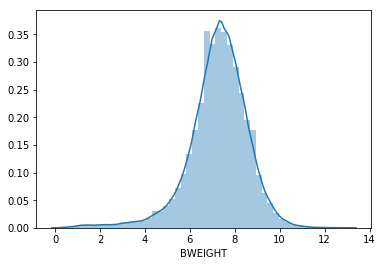

In [4]:
#histogram
sns.distplot(df['BWEIGHT']);

### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

In [5]:
#skewness and kurtosis
print("Skewness: %f" % df['BWEIGHT'].skew())
print("Kurtosis: %f" % df['BWEIGHT'].kurt())

Skewness: -0.936593
Kurtosis: 2.868780


### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [6]:
#now specifying label encodeded column to transform them
# I did this by observing the data
Label_Encoded_Columns = ['SEX', 'MARITAL','RACEMOM','RACEDAD', 
                         'HISPMOM', 'HISPDAD','ANEMIA','CARDIAC', 
                         'ACLUNG', 'DIABETES','HERPES', 'HYDRAM', 
                         'HEMOGLOB','HYPERCH','HYPERPR', 'ECLAMP', 
                         'CERVIX', 'PINFANT','PRETERM', 'RENAL',
                         'RHSEN', 'UTERINE']

In [7]:
# adding dummy vaiable columns from label encoded columns for following variables
# SEX, MARITAL, RACEMOM, RACEDAD, HISPMOM, HISPDAD, ANEMIA, CARDIAC, ACLUNG, DIABETES, 
# HERPES, HYDRAM, HEMOGLOB, HYPERCH,  ECLAMP, CERVIX, PINFANT, PRETERM, RENAL, RHSEN, UTERINE 

df = pd.get_dummies(data=df,columns = Label_Encoded_Columns)

In [8]:
#moving BWEIGHT to the end
df1 = df.pop('BWEIGHT') # remove column b and store it in df1
df['BWEIGHT']=df1 # add b series as a 'new' column.

### TASK 6: Do variable selection from the pool of 36 variables based on correlation score with the target variable BWEIGHT 
### Please report all the variables you kept for training.

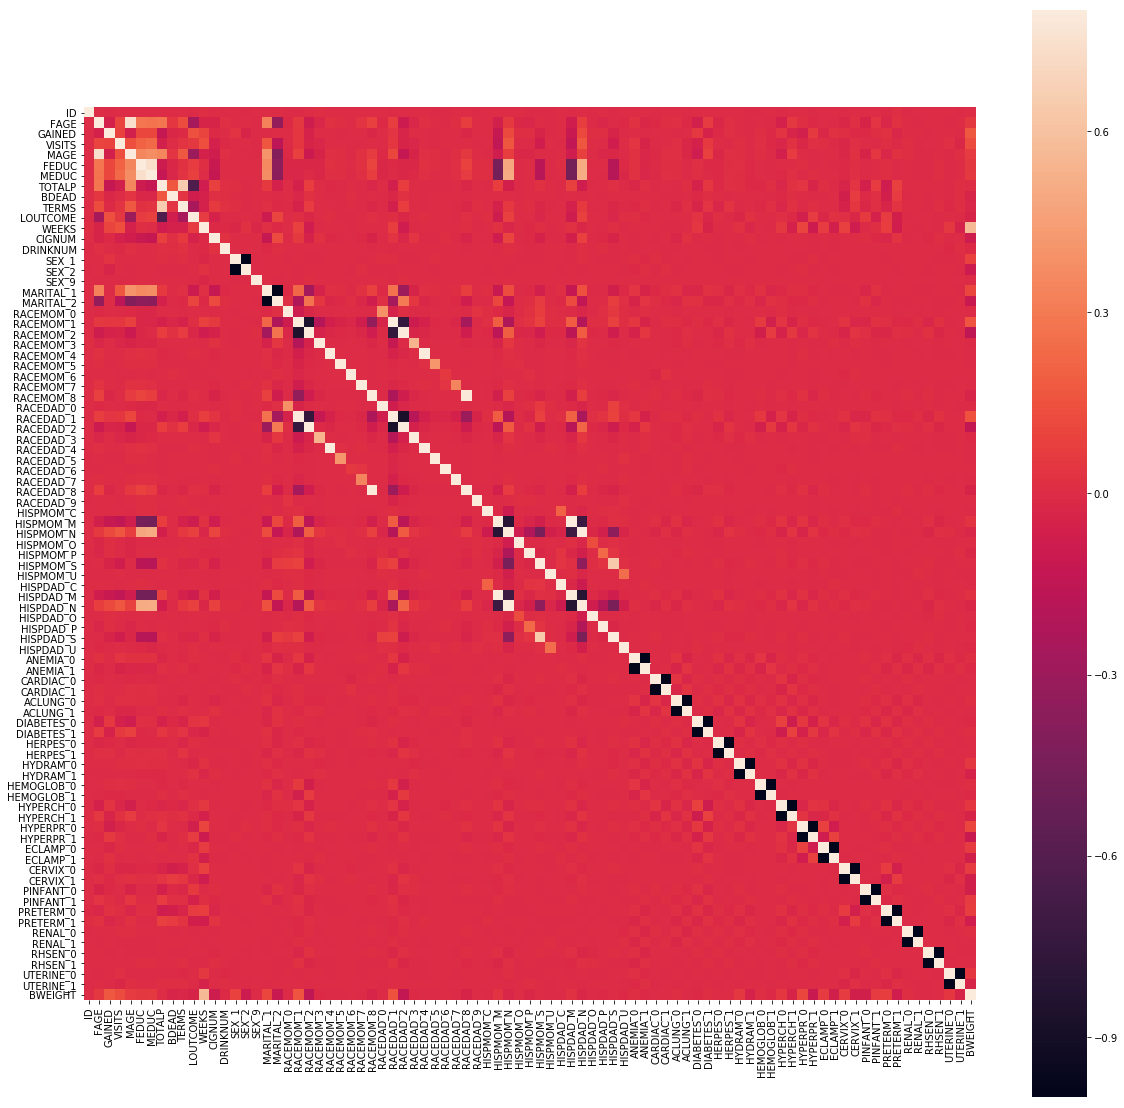

In [9]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

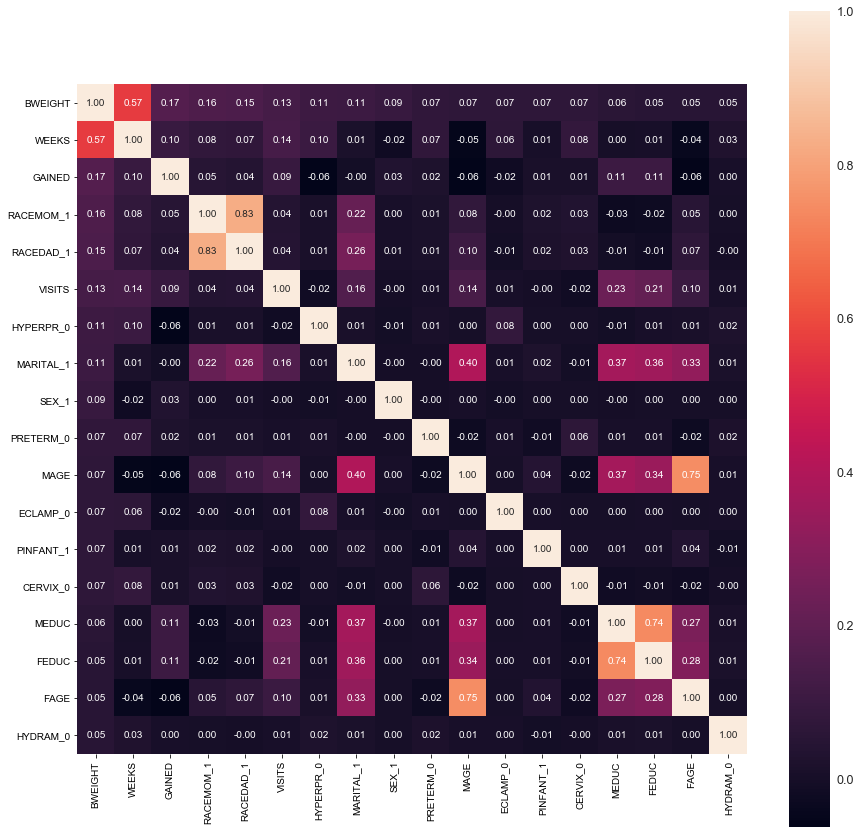

In [10]:
## Baby weight correlation matrix

k = 18  #number of variables for heatmap I only kept variable that has relationship more than 0.05

f, ax = plt.subplots(figsize=(15, 15))   # picture size

cols = corrmat.nlargest(k, 'BWEIGHT')['BWEIGHT'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:
cols

Index(['BWEIGHT', 'WEEKS', 'GAINED', 'RACEMOM_1', 'RACEDAD_1', 'VISITS',
       'HYPERPR_0', 'MARITAL_1', 'SEX_1', 'PRETERM_0', 'MAGE', 'ECLAMP_0',
       'PINFANT_1', 'CERVIX_0', 'MEDUC', 'FEDUC', 'FAGE', 'HYDRAM_0'],
      dtype='object')

In [12]:
# we are keeping only variable they are positively corelated to Birth weight
# anything equals or less than zero are dropped

# df = df[['WEEKS', 'GAINED', 'RACEMOM_1', 'RACEDAD_1', 'VISITS',
#        'HYPERPR_0', 'MARITAL_1', 'SEX_1', 'PRETERM_0', 'MAGE', 'ECLAMP_0',
#        'PINFANT_1', 'CERVIX_0', 'MEDUC', 'FEDUC', 'FAGE', 'HYDRAM_0','BWEIGHT']]
df = df[cols]

In [13]:
#moving BWEIGHT to the end
df1 = df.pop('BWEIGHT') # remove column b and store it in df1
df['BWEIGHT']=df1 # add b series as a 'new' column.

### TASK 7: Check for missing data, and apply a "good" strategy to tackle it

In [14]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
BWEIGHT,0,0.0
HYDRAM_0,0,0.0
GAINED,0,0.0
RACEMOM_1,0,0.0
RACEDAD_1,0,0.0
VISITS,0,0.0
HYPERPR_0,0,0.0
MARITAL_1,0,0.0
SEX_1,0,0.0
PRETERM_0,0,0.0


### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [15]:
#spliting input and target
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [16]:
#spliting the Training Test Data
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=0.2)

### TASK 9.2: On the training dataset, apply a normalization technique

In [17]:
#fit_transform use the statistics from given data and normalize it
scalar = StandardScaler()
scalar.fit(XTrain)                    # using XTrain data to normalization
XTrain = scalar.transform(XTrain)

### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [18]:
#transform  
# using XTrain data to normalization
XTest = scalar.transform(XTest)

### TASK 10: Find the linear regression function describing the training dataset using a technique you recently learned in class.  CLOSED-FORM vs. Gradient Descent (batch or stochastic or mini-batch).
###          PLEASE DO NOT CALL ANY LIBRARY FUNCTION THAT MIGHT DO THE TASK FOR YOU. If you do, you are most likely get a ZERO for this assignment.

In [19]:
#adding a X0 aka bias column to use the W0
XTrain = np.insert(XTrain, 0, values=1, axis=1)

In [20]:
#defining gradient_decent which will use the batch  

def gradient_descent(XTrain, yTrain, iterations, learningRate):
    theta= np.ones(XTrain.shape[1])
    m = len(XTrain)
    for it in range(iterations):
        h = np.dot(XTrain,theta)
        error = h - yTrain
        gradient = XTrain.T.dot(error)
        theta = theta - (1/m) * learningRate * (gradient)
        if (it % 1000)==0:
            print ("Error rate per iteration: "+str(np.mean(np.abs(error))))
    print ("\nFinal Error rate : "+str(np.mean(np.abs(error))) + "\n")
    return theta

In [21]:
Theta = gradient_descent(XTrain,yTrain,30000, 0.001)

Error rate per iteration: 6.6890447859712445
Error rate per iteration: 2.362703116534502
Error rate per iteration: 1.1174623718620056
Error rate per iteration: 0.8637679088809501
Error rate per iteration: 0.8253934233895674
Error rate per iteration: 0.8198265974647554
Error rate per iteration: 0.8189692891844196
Error rate per iteration: 0.8188070907029923
Error rate per iteration: 0.8187609495296322
Error rate per iteration: 0.8187428076596897
Error rate per iteration: 0.8187340034559941
Error rate per iteration: 0.8187297457248268
Error rate per iteration: 0.8187275989469618
Error rate per iteration: 0.8187263785489998
Error rate per iteration: 0.818725917821544
Error rate per iteration: 0.8187258652628677
Error rate per iteration: 0.8187259990633917
Error rate per iteration: 0.8187262202077229
Error rate per iteration: 0.8187264880985926
Error rate per iteration: 0.8187267188960108
Error rate per iteration: 0.8187269351768304
Error rate per iteration: 0.8187271194167985
Error rate p

### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line you learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [22]:
# inserting column of 1 in from of Test data to deal with the Theta 0 in the calculation
XTest = np.insert(XTest, 0, values=1, axis=1)

In [23]:
prediction = np.dot(XTest,Theta)

In [24]:
RMSE = np.sqrt(np.mean((prediction - yTest)**2))

In [25]:
RMSEs = []
RMSEs.append(RMSE)
RMSEs

[1.0460416973325302]

### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)


In [26]:
for x in range(4): # repeating four times all the steps from  which
        #spliting the Training Test Data
        XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=0.2)

        #fit_transform use the statistics from given data and normalize it
        scalar = StandardScaler()
        scalar.fit(XTrain)                    # using XTrain data to normalization
        XTrain = scalar.transform(XTrain)

        #transform  
        # using XTrain data to normalization
        XTest = scalar.transform(XTest)

        #adding a X0 aka bias column to use the W0
        XTrain = np.insert(XTrain, 0, values=1, axis=1)

        Theta = gradient_descent(XTrain,yTrain,30000, 0.001)

        # inserting column of 1 in from of Test data to deal with the Theta 0 in the calculation
        XTest = np.insert(XTest, 0, values=1, axis=1)

        prediction = np.dot(XTest,Theta)

        RMSE = np.sqrt(np.mean((prediction - yTest)**2))

        RMSEs.append(RMSE)

Error rate per iteration: 6.689744875630594
Error rate per iteration: 2.3590990469566906
Error rate per iteration: 1.11461307643736
Error rate per iteration: 0.8623872439886457
Error rate per iteration: 0.8244378430205146
Error rate per iteration: 0.8189464845363194
Error rate per iteration: 0.818083603819137
Error rate per iteration: 0.8179184712968456
Error rate per iteration: 0.8178730511156919
Error rate per iteration: 0.817855459702043
Error rate per iteration: 0.8178465796211842
Error rate per iteration: 0.8178421565657451
Error rate per iteration: 0.8178400775630825
Error rate per iteration: 0.8178390402353106
Error rate per iteration: 0.8178385459384334
Error rate per iteration: 0.8178383752744551
Error rate per iteration: 0.8178384795696639
Error rate per iteration: 0.8178386961849194
Error rate per iteration: 0.8178389621410886
Error rate per iteration: 0.8178391875850184
Error rate per iteration: 0.8178393683226312
Error rate per iteration: 0.8178395198066505
Error rate per 

In [27]:
RMSEs

[1.0460416973325302,
 1.0503846268673394,
 1.0433668647741192,
 1.0458247424931675,
 1.0448476643991764]

### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [28]:
Stdev = np.std(RMSEs)
Average = np.mean(RMSEs)
Stdev, Average

(0.0023441556765533243, 1.0460931191732665)

### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [29]:
#fit_transform use the statistics from given data and normalize it
scalar = StandardScaler()
scalar.fit(X)                    
XAll = scalar.transform(X)

In [30]:
#adding a X0 aka bias column to use the W0
XAll = np.insert(XAll, 0, values=1, axis=1)

In [31]:
yAll = y

In [32]:
Theta = gradient_descent(XAll,yAll,30000, 0.001)

Error rate per iteration: 6.691714898976889
Error rate per iteration: 2.3613699199662515
Error rate per iteration: 1.1158679231979962
Error rate per iteration: 0.8625430691882148
Error rate per iteration: 0.8243953214991572
Error rate per iteration: 0.8189342081761358
Error rate per iteration: 0.8181170847288395
Error rate per iteration: 0.8179718325635886
Error rate per iteration: 0.8179352570197682
Error rate per iteration: 0.817922782523324
Error rate per iteration: 0.8179175276966609
Error rate per iteration: 0.8179151748942097
Error rate per iteration: 0.817914520893114
Error rate per iteration: 0.8179147033152575
Error rate per iteration: 0.817915255432208
Error rate per iteration: 0.8179158318014679
Error rate per iteration: 0.8179163726754564
Error rate per iteration: 0.8179168534226844
Error rate per iteration: 0.8179173321833682
Error rate per iteration: 0.8179177471858646
Error rate per iteration: 0.8179180905119501
Error rate per iteration: 0.8179183895604802
Error rate per

### Task 14: Preprocess the judge-without-label.csv file according টo the strategy you applied above on the whole dataset (task 13)

In [33]:
df2 = pd.read_csv('judge-without-labels.csv')
df2.columns

Index(['ID', 'SEX', 'MARITAL', 'FAGE', 'GAINED', 'VISITS', 'MAGE', 'FEDUC',
       'MEDUC', 'TOTALP', 'BDEAD', 'TERMS', 'LOUTCOME', 'WEEKS', 'RACEMOM',
       'RACEDAD', 'HISPMOM', 'HISPDAD', 'CIGNUM', 'DRINKNUM', 'ANEMIA',
       'CARDIAC', 'ACLUNG', 'DIABETES', 'HERPES', 'HYDRAM', 'HEMOGLOB',
       'HYPERCH', 'HYPERPR', 'ECLAMP', 'CERVIX', 'PINFANT', 'PRETERM', 'RENAL',
       'RHSEN', 'UTERINE'],
      dtype='object')

In [34]:
df2 = pd.get_dummies(data=df2,columns = Label_Encoded_Columns)

In [35]:
#finiding column name that need to kept according to training data and removing target
colWithoutBW = cols

In [36]:
colWithoutBW = colWithoutBW.tolist()
colWithoutBW.pop(0)

'BWEIGHT'

In [37]:
len(colWithoutBW)

17

In [38]:
# we are keeping only top correlated variables
# anything else are dropped

df_judge = df2[colWithoutBW]

### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file, and save the results in judge-submission-run-1.csv in the format below. Please change the run number and report what changes you have made in a corresponding file run-1.txt.

In [39]:
#fit_transform use the statistics from given data and normalize it
scalar = StandardScaler()
scalar.fit(df_judge)                    # using XTrain data to normalization
XJudge = scalar.transform(df_judge)

In [40]:
#adding a X0 aka bias column to use the W0
XJudge = np.insert(XJudge, 0, values=1, axis=1)

In [41]:
predict_BW = np.dot(XJudge,Theta)

In [42]:
IDCol = df2.iloc[:,:1].values #extracing ID from csv

In [43]:
predict_BW = predict_BW.reshape((-1, 1))  #transposing the output column

In [44]:
result = np.hstack((IDCol,predict_BW)) #concatinating ID and prediction

In [45]:
header=["ID","BWEIGHT"]    #header name

In [46]:
df3 = pd.DataFrame(data=result,columns=header)  #making dataframe ready to write to csv
df3.ID = df3.ID.astype('int64') 

In [47]:
df3.to_csv('sample_submission.csv', sep=',',index=False)   #printing to csv.

# Tasks only for CSCI-5930 (Grad) students

### Task 16: Repeat tasks 9-12 three times, and 
### report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

In [48]:
RMSEs

[1.0460416973325302,
 1.0503846268673394,
 1.0433668647741192,
 1.0458247424931675,
 1.0448476643991764]

In [49]:
ultimateRMSEs = []
ultimateRMSEs = RMSEs      # adding RMSES from previous steps

for x in range(3):     # repeating three times all the steps of task 9-12
    RMSEs = []
    for x in range(4): # repeating four times all the steps from as said in task 10
        #spliting the Training Test Data
        XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size=0.2)

        #fit_transform use the statistics from given data and normalize it
        scalar = StandardScaler()
        scalar.fit(XTrain)                    # using XTrain data to normalization
        XTrain = scalar.transform(XTrain)

        #transform  
        # using XTrain data to normalization
        XTest = scalar.transform(XTest)

        #adding a X0 aka bias column to use the W0
        XTrain = np.insert(XTrain, 0, values=1, axis=1)

        Theta = gradient_descent(XTrain,yTrain,30000, 0.001)

        # inserting column of 1 in from of Test data to deal with the Theta 0 in the calculation
        XTest = np.insert(XTest, 0, values=1, axis=1)

        prediction = np.dot(XTest,Theta)

        RMSE = np.sqrt(np.mean((prediction - yTest)**2))

        RMSEs.append(RMSE)
    # collecting RMSEs from this Batch
    ultimateRMSEs = ultimateRMSEs + RMSEs


Error rate per iteration: 6.685159281506058
Error rate per iteration: 2.360648674188104
Error rate per iteration: 1.1166678787601194
Error rate per iteration: 0.8629775270142787
Error rate per iteration: 0.8246485618186943
Error rate per iteration: 0.819063875967439
Error rate per iteration: 0.8182148107489362
Error rate per iteration: 0.818056886346372
Error rate per iteration: 0.8180151078133374
Error rate per iteration: 0.8179997708355622
Error rate per iteration: 0.8179935209960099
Error rate per iteration: 0.8179910950601904
Error rate per iteration: 0.8179906295763804
Error rate per iteration: 0.8179910734864767
Error rate per iteration: 0.8179916707622945
Error rate per iteration: 0.8179923947220851
Error rate per iteration: 0.817993201983234
Error rate per iteration: 0.8179939382206759
Error rate per iteration: 0.8179945601050379
Error rate per iteration: 0.8179950976194984
Error rate per iteration: 0.8179955616258956
Error rate per iteration: 0.8179959335301521
Error rate per 

Error rate per iteration: 0.8159804318872845

Final Error rate : 0.8159804874485026

Error rate per iteration: 6.695376001041836
Error rate per iteration: 2.362081977425112
Error rate per iteration: 1.1165256937279313
Error rate per iteration: 0.862622429419502
Error rate per iteration: 0.8242718161704939
Error rate per iteration: 0.8187576427695166
Error rate per iteration: 0.8179466733982953
Error rate per iteration: 0.8178143108371009
Error rate per iteration: 0.8177848501549129
Error rate per iteration: 0.8177767519895648
Error rate per iteration: 0.8177742516705719
Error rate per iteration: 0.81777363451305
Error rate per iteration: 0.8177738757402638
Error rate per iteration: 0.8177749756264111
Error rate per iteration: 0.8177761335833745
Error rate per iteration: 0.8177772518797867
Error rate per iteration: 0.8177781971486967
Error rate per iteration: 0.8177789833909799
Error rate per iteration: 0.8177796383718829
Error rate per iteration: 0.8177802268856846
Error rate per itera

Error rate per iteration: 0.8179204155449231
Error rate per iteration: 0.817920451633058
Error rate per iteration: 0.8179204795867573

Final Error rate : 0.8179205005272313



In [50]:
UltimateStdev = np.std(ultimateRMSEs)
UltimateAverage = np.mean(ultimateRMSEs)


UltimateStdev, UltimateAverage

(0.004419155079464407, 1.049674261486894)

### Task 17: Make an entry in the Kaggle challenge below:
* [ https://www.kaggle.com/c/csci-ml-s19-pa1/ ] 
* Please join the challenge and submit a judge-submission-run1.csv file, and please report your Kaggle handle here too.
### There is limit of 5 entries each day untile the deadline.
### For each of the runs you submit, please report here the RMSE you got (as reported by the Kaggle platform).

In [1]:
# #Kaggle haddle --> Bhuwan

# #1
# 1.04709
# #2
# 1.04709
# #3
# 1.04906
# #
# 1.04788